#  K-distance graph and find the value of epsilon

Using  K-distance graph and find the value of epsilon. Source: 
https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

Let’s first run DBSCAN without any parameter optimization and see the results.
And create the data set.

In [1]:
# Import the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),
             math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [3]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

In [4]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


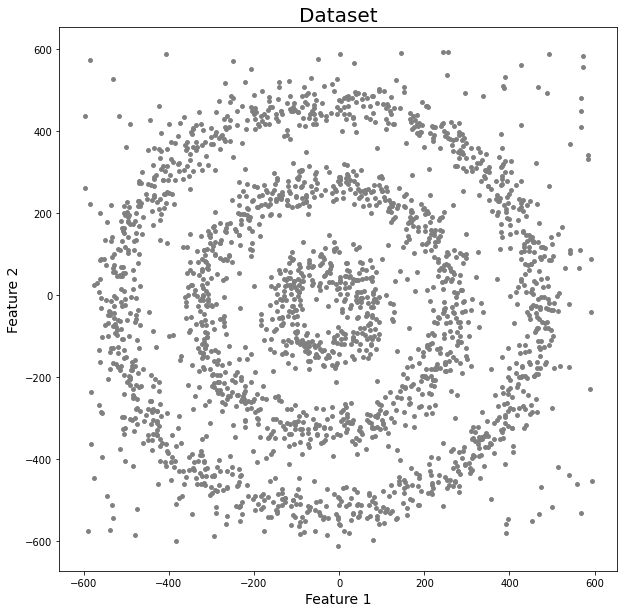

In [5]:
# Let’s plot these data points and see how they look in the feature space.
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15, color='grey')
plt.title('Dataset', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

# 1. K-Means

We’ll first start with K-Means because it is the easiest clustering algorithm 

In [6]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

 Use labels_ to retrieve the labels. I have added these labels to the dataset in the new column so that data management can become easier. But don’t worry – I will only use two columns of the dataset for fitting other algorithms.

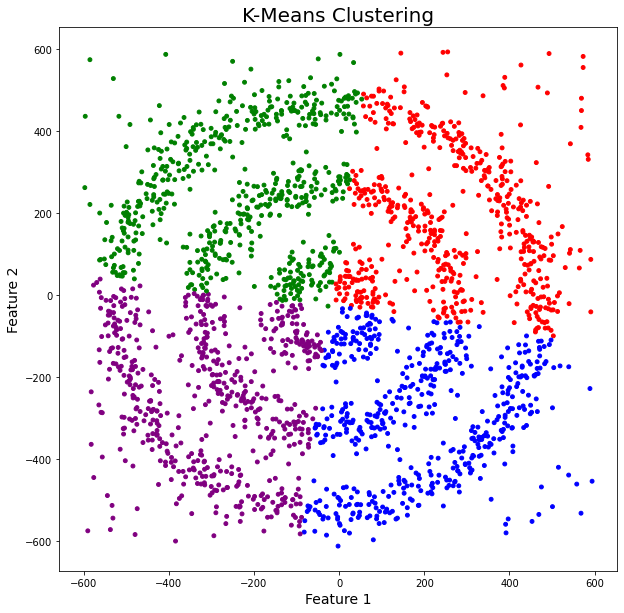

In [7]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Here, K-means failed to cluster the data points into four clusters. Also, it didn’t work well with noise. Therefore, it is time to try another popular clustering algorithm, i.e., Hierarchical Clustering.

# 2. Hierarchical Clustering

Performing Agglomerative Clustering but there is also another type of hierarchical clustering algorithm known as Divisive Clustering. Use the following syntax:

In [8]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

Taking labels from the Agglomerative Clustering model and plotting the results using a scatter plot. It is similar to what I did with KMeans.

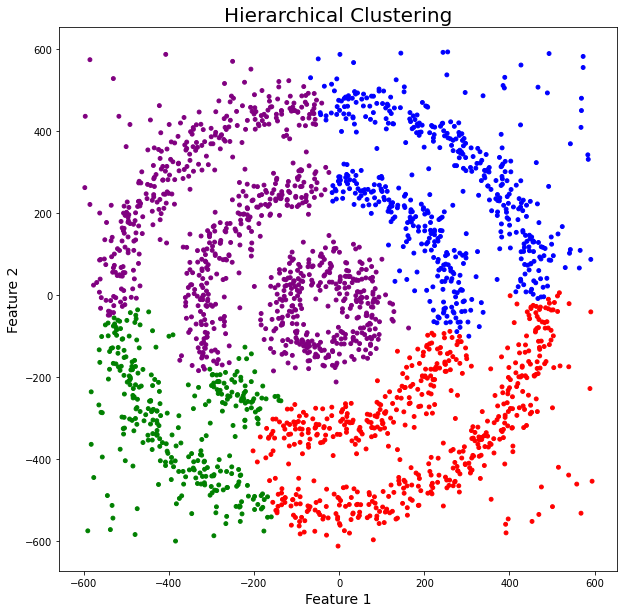

In [9]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1], c=df['HR_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

Sadly, the hierarchical clustering algorithm also failed to cluster the data points properly. 

# 3. DBSCAN Clustering

Now, it’s time to implement DBSCAN and see its power. Import DBSCAN from sklearn.cluster. Let’s first run DBSCAN without any parameter optimization and see the results.

In [10]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

Here, epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model:

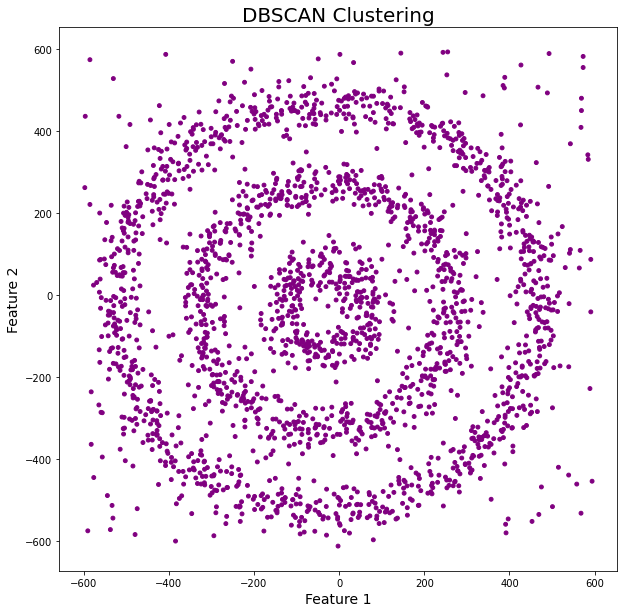

In [11]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.
For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.

In [12]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.

In [13]:
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax:

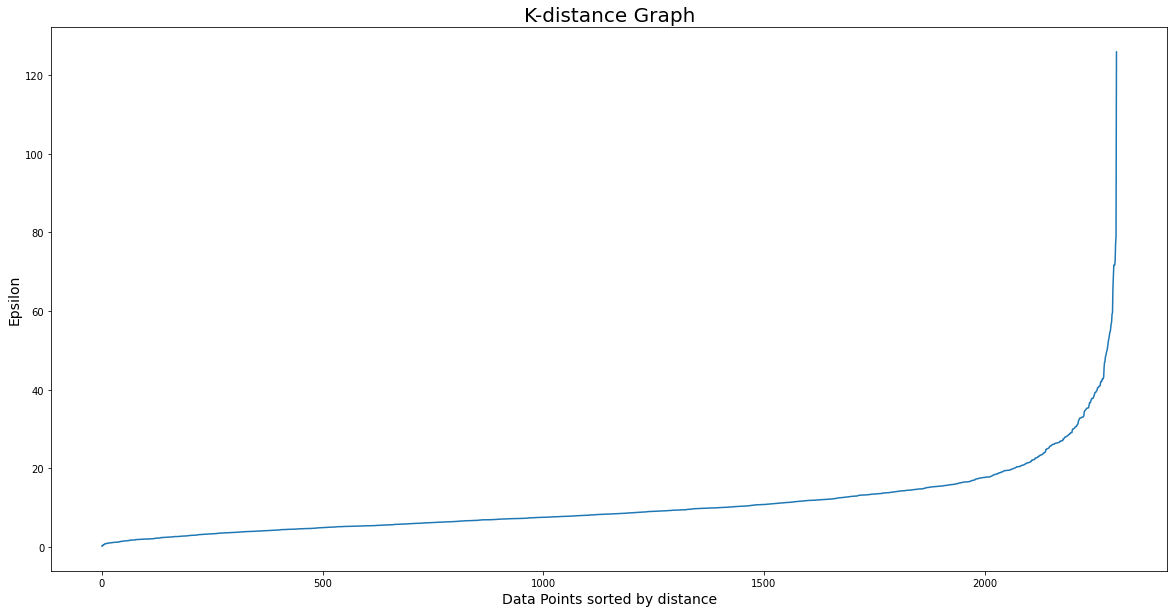

In [14]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [15]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30, min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [16]:
df['DBSCAN_opt_labels'] = dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 and 2 are the three different clusters, and -1 is the noise. Let’s plot the results and see what we get.

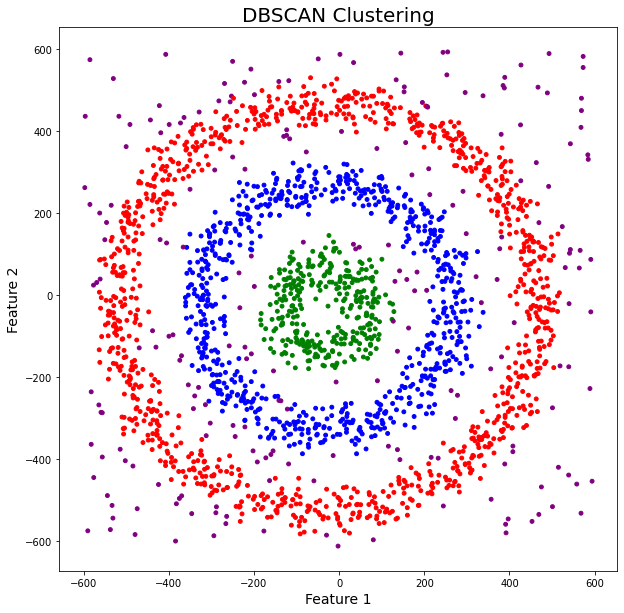

In [17]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

DBSCAN amazingly clustered the data points into three clusters, and it also detected noise in the dataset represented by the purple color.

One thing important to note here is that, though DBSCAN creates clusters based on varying densities, it struggles with clusters of similar densities. Also, as the dimension of data increases, it becomes difficult for DBSCAN to create clusters and it falls prey to the Curse of Dimensionality.

# 4. OPTICS

In [18]:
from sklearn.cluster import OPTICS

In [34]:
clustering = OPTICS(min_samples=15).fit(df[[0,1]])
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [35]:
df['OPTICS_opt_labels'] = clustering.labels_
df['OPTICS_opt_labels'].value_counts()

-1     1641
 3      121
 12      55
 5       44
 7       41
 10      38
 8       33
 0       31
 2       24
 15      23
 17      23
 1       22
 18      22
 21      21
 19      20
 14      20
 20      19
 4       19
 16      18
 9       17
 13      17
 6       16
 11      15
Name: OPTICS_opt_labels, dtype: int64

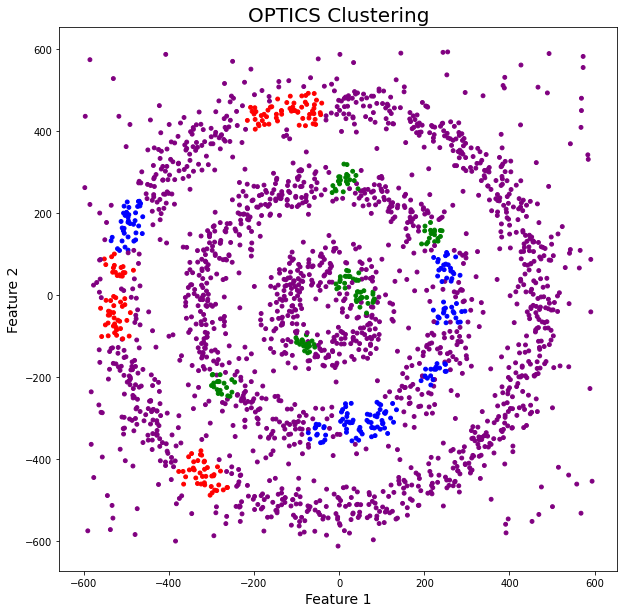

In [36]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['OPTICS_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('OPTICS Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()